# Imports

In [ ]:
import math
import os
import sys

import boto3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append("scripts")
from deseq.deseq_data import create_deseq_metadata
from expressions_EDA import load_est_counts_from_s3

# Preparing Sample Metadata for DESeq2 Differential Expression Analysis

In [7]:
annotations_filtered = pd.read_csv("../data/annotations_whole_blood.csv", index_col=0)

In [12]:
annotations_filtered.Diagnosis.value_counts()

Healthy                                     292
Systemic_lupus_erythematosus                196
Rheumatoid_arthritis                        190
Juvenile_idiopathic_arthritis               115
Type_1_diabetes_mellitus                     65
Crohn_disease                                60
Relapsing-remitting_multiple_sclerosis       20
Systemic_inflammatory_response_syndrome      17
Ulcerative_colitis                           15
Psoriasis                                    10
Arthropathic_psoriasis                       10
Secondary_progressive_multiple_sclerosis     10
Ankylosing_spondylitis                        8
Name: Diagnosis, dtype: int64

In [13]:
annotations_filtered

,Dataset,Run,GSM,Sample_type,Sample_type_details,Tissue_stimulation,Therapy_type,Diagnosis,Diagnosis_comment,Stage,...,Layout,Readcounts,To_check,QC_bad,QC_good,QC_score,Who_checks,Decision,Expression_comment,Spike_in
SRX3703081,GSE110685,SRR6730133,GSM3011776,Whole_blood,NaN,Without_stimulation,Without_therapy,Healthy,NaN,NaN,...,SINGLE,8677272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX3703083,GSE110685,SRR6730135,GSM3011778,Whole_blood,NaN,Without_stimulation,Without_therapy,Healthy,NaN,NaN,...,SINGLE,9675604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX3703084,GSE110685,SRR6730136,GSM3011779,Whole_blood,NaN,Without_stimulation,Without_therapy,Systemic_lupus_erythematosus,NaN,NaN,...,SINGLE,40939864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX3703085,GSE110685,SRR6730137,GSM3011780,Whole_blood,NaN,Without_stimulation,Without_therapy,Systemic_lupus_erythematosus,NaN,NaN,...,SINGLE,8744154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX3703086,GSE110685,SRR6730138,GSM3011781,Whole_blood,NaN,Without_stimulation,Without_therapy,Systemic_lupus_erythematosus,NaN,NaN,...,SINGLE,31979792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRX12109261,GSE183701,SRR15817169,GSM5568065,Whole_blood,NaN,Without_stimulation,Without_therapy,Healthy,NaN,NaN,...,PAIRED,5287469.0,NaN,NaN,NaN,5.541667,NaN,NaN,NaN,NaN
SRX12109262,GSE183701,SRR15817170,GSM5568066,Whole_blood,NaN,Without_stimulation,Without_therapy,Healthy,NaN,NaN,...,PAIRED,4534915.0,NaN,NaN,NaN,5.541667,NaN,NaN,NaN,NaN
SRX12109263,GSE183701,SRR15817171,GSM5568067,Whole_blood,NaN,Without_stimulation,No_data,Type_1_diabetes_mellitus,NaN,NaN,...,PAIRED,2577781.0,NaN,NaN,NaN,4.958333,NaN,NaN,NaN,NaN
SRX12109264,GSE183701,SRR15817172,GSM5568068,Whole_blood,NaN,Without_stimulation,No_data,Type_1_diabetes_mellitus,NaN,NaN,...,PAIRED,4653394.0,NaN,NaN,NaN,5.541667,NaN,NaN,NaN,NaN


In [42]:
files = create_deseq_metadata(annotations_filtered, output_dir="../data/deseq/metadata")

✔ Saved: ../data/deseq/metadata/DESeq_metadata_GSE110685_Systemic_lupus_erythematosus.csv (35 diseased + 16 healthy)
✔ Saved: ../data/deseq/metadata/DESeq_metadata_GSE117769_Rheumatoid_arthritis.csv (51 diseased + 49 healthy)
✔ Saved: ../data/deseq/metadata/DESeq_metadata_GSE117769_Ankylosing_spondylitis.csv (8 diseased + 49 healthy)
✔ Saved: ../data/deseq/metadata/DESeq_metadata_GSE117769_Arthropathic_psoriasis.csv (10 diseased + 49 healthy)
✔ Saved: ../data/deseq/metadata/DESeq_metadata_GSE112057_Crohn_disease.csv (60 diseased + 12 healthy)
✔ Saved: ../data/deseq/metadata/DESeq_metadata_GSE112057_Ulcerative_colitis.csv (15 diseased + 12 healthy)
✔ Saved: ../data/deseq/metadata/DESeq_metadata_GSE112057_Juvenile_idiopathic_arthritis.csv (115 diseased + 12 healthy)
✔ Saved: ../data/deseq/metadata/DESeq_metadata_GSE90081_Rheumatoid_arthritis.csv (12 diseased + 12 healthy)
✔ Saved: ../data/deseq/metadata/DESeq_metadata_GSE123658_Type_1_diabetes_mellitus.csv (39 diseased + 43 healthy)
✔ Sa

# Importing Raw Gene Expression Counts from Amazon S3

In [ ]:
samples = annotations_filtered.index.tolist()

In [20]:
expr_counts = load_est_counts_from_s3(samples)
expr_counts.to_csv("../data/expression_counts.csv")

Loaded: database/SRX3703081/kallisto/SRX3703081-kallisto-Xena-gene-est_counts_without_noncoding.tsv
Loaded: database/SRX3703083/kallisto/SRX3703083-kallisto-Xena-gene-est_counts_without_noncoding.tsv
Loaded: database/SRX3703084/kallisto/SRX3703084-kallisto-Xena-gene-est_counts_without_noncoding.tsv
Loaded: database/SRX3703085/kallisto/SRX3703085-kallisto-Xena-gene-est_counts_without_noncoding.tsv
Loaded: database/SRX3703086/kallisto/SRX3703086-kallisto-Xena-gene-est_counts_without_noncoding.tsv
Loaded: database/SRX3703087/kallisto/SRX3703087-kallisto-Xena-gene-est_counts_without_noncoding.tsv
Loaded: database/SRX3703088/kallisto/SRX3703088-kallisto-Xena-gene-est_counts_without_noncoding.tsv
Loaded: database/SRX3703089/kallisto/SRX3703089-kallisto-Xena-gene-est_counts_without_noncoding.tsv
Loaded: database/SRX3703090/kallisto/SRX3703090-kallisto-Xena-gene-est_counts_without_noncoding.tsv
Loaded: database/SRX3703091/kallisto/SRX3703091-kallisto-Xena-gene-est_counts_without_noncoding.tsv


# Running DESeq2 and Analyzing Results

In [ ]:
!python scripts/deseq/run_deseq2_pipeline.py

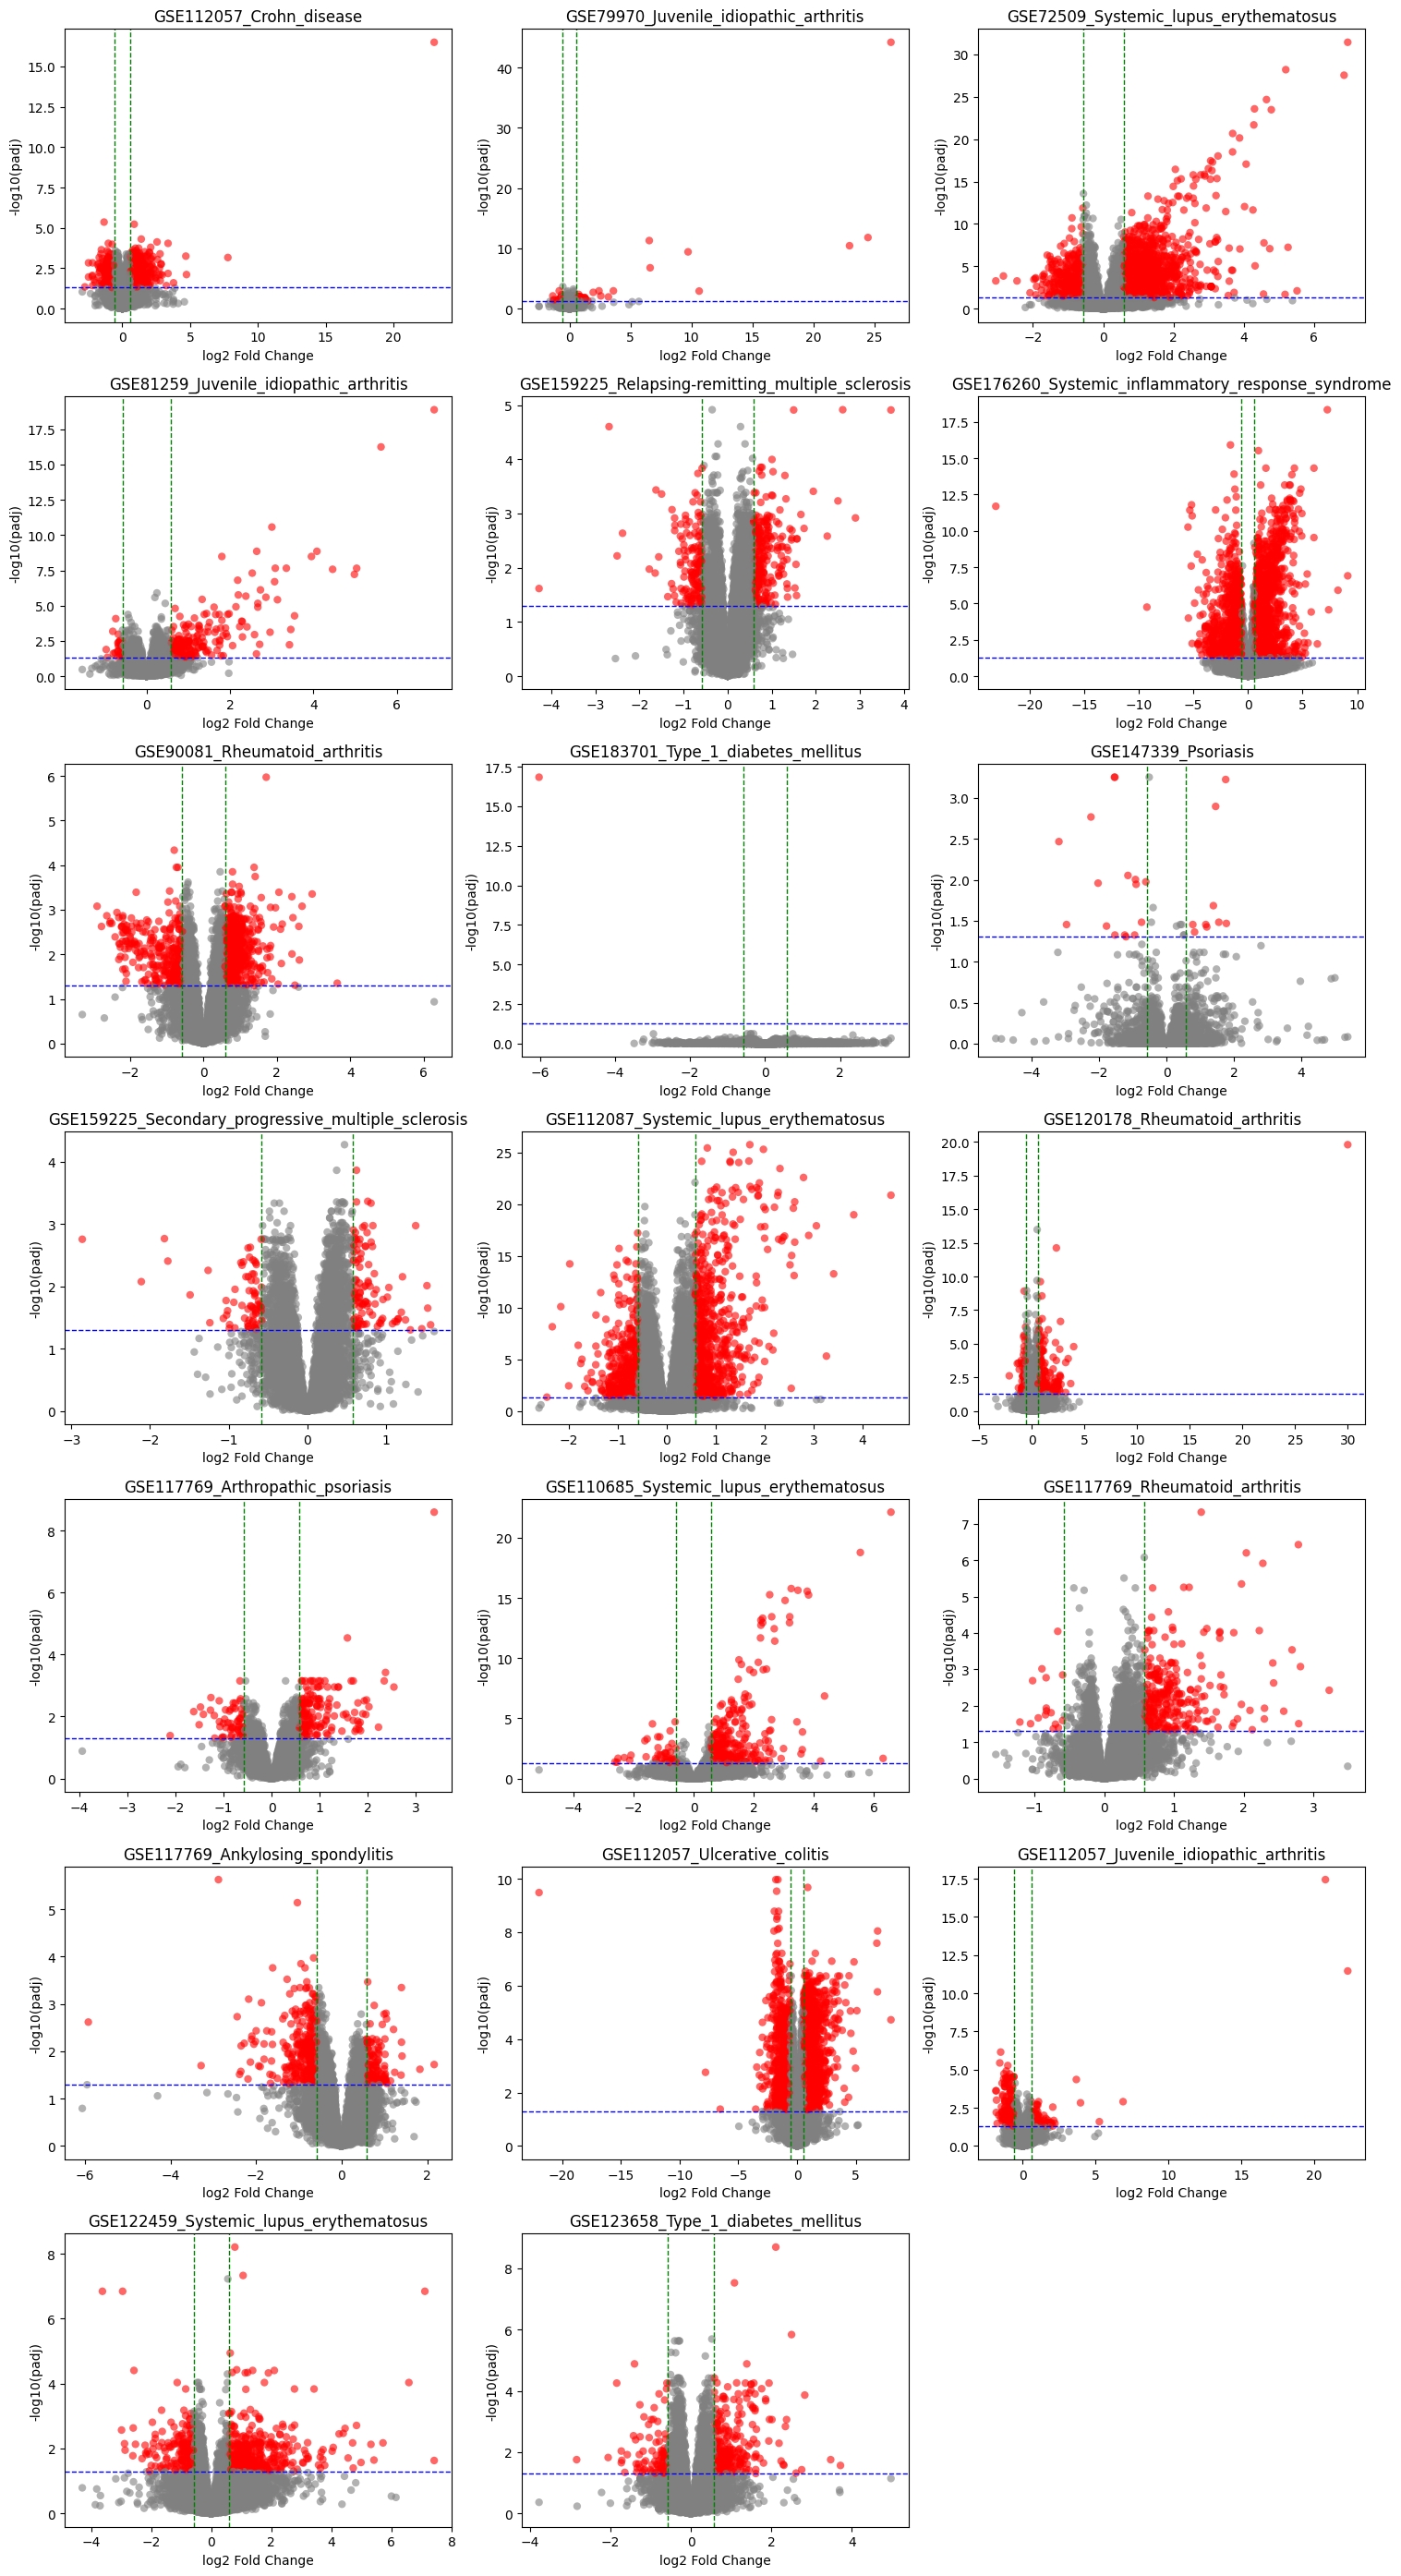

In [45]:
results_folder = "../data/deseq/results"
lfc_threshold = 0.58
files = [
    f
    for f in os.listdir(results_folder)
    if f.endswith(".csv") and "_DEGs" not in f and "_TOP" not in f
]

ncols = 3
nrows = math.ceil(len(files) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for idx, file in enumerate(files):
    ax = axes[idx]
    path = os.path.join(results_folder, file)
    df = pd.read_csv(path)

    if "padj" not in df.columns or "log2FoldChange" not in df.columns:
        continue

    df = df.dropna(subset=["padj", "log2FoldChange"])
    df["neg_log10_padj"] = -np.log10(df["padj"])
    df["significant"] = (df["padj"] < 0.05) & (
        abs(df["log2FoldChange"]) > lfc_threshold
    )

    ax.scatter(
        df["log2FoldChange"],
        df["neg_log10_padj"],
        c=df["significant"].map({True: "red", False: "grey"}),
        alpha=0.6,
        edgecolors="none",
    )

    ax.axhline(-np.log10(0.05), color="blue", linestyle="--", linewidth=1)
    ax.axvline(-lfc_threshold, color="green", linestyle="--", linewidth=1)
    ax.axvline(lfc_threshold, color="green", linestyle="--", linewidth=1)

    ax.set_title(file.replace("deseq2_", "").replace(".csv", ""))
    ax.set_xlabel("log2 Fold Change")
    ax.set_ylabel("-log10(padj)")

for j in range(len(files), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [46]:
results_folder = "../data/deseq/results"
all_deg = []

required_columns = ["gene", "log2FoldChange", "padj", "direction"]

for file in os.listdir(results_folder):
    if not file.endswith("_DEGs.csv"):
        continue

    path = os.path.join(results_folder, file)
    df = pd.read_csv(path)

    missing = [col for col in required_columns if col not in df.columns]
    if missing:
        print(f"Пропускаем файл {file} — нет колонок: {missing}")
        continue

    condition = file.replace("deseq2_", "").replace("_DEGs.csv", "")
    diagnosis = condition.split("_", 1)[1]
    df["diagnosis"] = diagnosis

    all_deg.append(df[required_columns + ["diagnosis"]])

if all_deg:
    merged = pd.concat(all_deg, ignore_index=True)
    merged.to_csv(
        os.path.join(results_folder, "ALL_DEGs_combined_all.csv"), index=False
    )
    print("Merged DEGs:", merged.shape)
else:
    print("Files are not found.")

Merged DEGs: (16071, 5)


In [28]:
up_in_disease = merged[merged["direction"] == "up_in_disease"]
disease_counts = up_in_disease["gene"].value_counts().reset_index()
disease_counts.columns = ["gene", "n_diagnoses_up_in_disease"]

disease_counts.query("n_diagnoses_up_in_disease > 5 ")

,gene,n_diagnoses_up_in_disease
0,HP,11
1,ADAMTS2,11
2,ARG1,11
3,DAAM2,11
4,TNFAIP6,11
...,...,...
231,OLR1,6
232,CSGALNACT2,6
233,IGHG1,6
234,MCTP1,6


In [29]:
top_genes = disease_counts.query("n_diagnoses_up_in_disease > 6")["gene"].tolist()
len(top_genes)

143

In [47]:
results_folder = "../data/deseq/results"
merged = pd.read_csv(os.path.join(results_folder, "ALL_DEGs_combined_all.csv"))
merged = merged.dropna(subset=["padj"])
top_genes_per_diagnosis = (
    merged.sort_values(["diagnosis", "padj"])
    .groupby("diagnosis", group_keys=False)
    .head(50)
)

output_path = os.path.join(results_folder, "TOP50_DEGs_per_diagnosis.csv")
top_genes_per_diagnosis.to_csv(output_path, index=False)

print(f"Сохранено: {output_path} ({top_genes_per_diagnosis.shape[0]} строк)")

Сохранено: ../data/deseq/results/TOP50_DEGs_per_diagnosis.csv (575 строк)


In [48]:
gene_diagnosis_counts = (
    top_genes_per_diagnosis.groupby("gene")["diagnosis"]
    .nunique()
    .reset_index(name="n_diagnoses")
    .sort_values("n_diagnoses", ascending=False)
)

output_path = os.path.join(results_folder, "UNIQUE_genes_from_TOP50_with_counts.csv")
gene_diagnosis_counts.to_csv(output_path, index=False)

print(f"Saved {gene_diagnosis_counts.shape[0]} genes: {output_path}")

Saved 500 genes: ../data/deseq/results/UNIQUE_genes_from_TOP50_with_counts.csv


In [49]:
top_genes2 = gene_diagnosis_counts.query("n_diagnoses > 1")["gene"].tolist()
len(top_genes2)

53

In [50]:
literature_found_list = [
    "HP",
    "ARG1",
    "C1QC",
    "C1QB",
    "METTL7B",
    "S100A12",
    "S100A9",
    "MCEMP1",
    "RNASE1",
    "ANXA3",
    "BMX",
    "CA4",
    "CD177",
    "OLAH",
    "SLC26A8",
    "FOLR3",
    "S100A8",
    "MMP8",
    "ADAMTS2",
    "FCGR1B",
    "ITGA7",
    "SAMSN1",
    "GRB10",
    "DHRS9",
    "ALOX5AP",
    "MPO",
    "TDRD9",
    "NAIP",
    "RETN",
    "BPI",
    "PLBD1",
    "VNN1",
    "GADD45A",
    "RNASE2",
    "ABCA1",
    "IFI27",
    "C1QA",
    "AIM2",
    "GPR84",
    "DEFA3",
    "GALNT14",
    "IL1R2",
    "TNFAIP6",
    "LCN2",
    "CLEC4D",
    "FCAR",
    "PGLYRP1",
    "BATF2",
    "CRISP3",
    "FCER1G",
    "IRAK3",
    "LILRA5",
    "LTF",
    "ASPH",
    "AC007325.1",
    "CNGB1",
    "COL17A1",
    "DUSP13",
    "GPR42",
    "LIPM",
    "LRRN1",
    "MAOA",
    "PLIN4",
    "POM121L7",
]

In [51]:
final_genes = list(set(literature_found_list) | set(top_genes) | set(top_genes2))
len(final_genes)

206

In [53]:
with open("../data/final_dif_gene_list.txt", "w") as f:
    for gene in final_genes:
        f.write(gene + "\n")